In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/signature95/tistory/main/dataset/divvy_daily.csv', index_col = 'date')

In [5]:
# lag 설명을 위해 dataframe 생성

rides = data["rides"].to_frame(name="rides")
rides = rides.loc[::-1]
rides["lag_1"] = rides["rides"].shift(periods=1)
rides["lag_2"] = rides["rides"].shift(periods=2)

rides

,rides,lag_1,lag_2
date,,,
12/31/2017,593,NaN,NaN
12/30/2017,519,593.0,NaN
12/29/2017,1049,519.0,593.0
12/28/2017,1267,1049.0,519.0
12/27/2017,1117,1267.0,1049.0
...,...,...,...
1/5/2014,32,1.0,831.0
1/4/2014,181,32.0,1.0
1/3/2014,6,181.0,32.0


lag at 0's autocorrelation =  1.0
lag at 1's autocorrelation =  0.86
lag at 2's autocorrelation =  0.74
lag at 3's autocorrelation =  0.71
lag at 4's autocorrelation =  0.7
lag at 5's autocorrelation =  0.71
lag at 6's autocorrelation =  0.8
lag at 7's autocorrelation =  0.87
lag at 8's autocorrelation =  0.79
lag at 9's autocorrelation =  0.7
lag at 10's autocorrelation =  0.68
lag at 11's autocorrelation =  0.67
lag at 12's autocorrelation =  0.68
lag at 13's autocorrelation =  0.78
lag at 14's autocorrelation =  0.85
lag at 15's autocorrelation =  0.77
lag at 16's autocorrelation =  0.67
lag at 17's autocorrelation =  0.66
lag at 18's autocorrelation =  0.65
lag at 19's autocorrelation =  0.66
lag at 20's autocorrelation =  0.76
lag at 21's autocorrelation =  0.82
lag at 22's autocorrelation =  0.75
Bartlett's formula를 통해 구현한 1번째 lag애서 파란 음영의 값 범위는 -0.05134832667210012, +0.05134832667210012입니다.


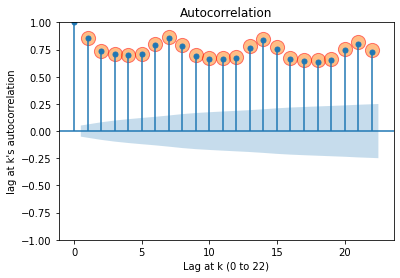

In [3]:
def acf_plot(data, N_LAGS, pval):
    from statsmodels.graphics.tsaplots import plot_acf
    import scipy.stats
    auto = pd.Series(data.values)
    for i in range(0, N_LAGS+1):
        print(f"lag at {i}'s autocorrelation = ", round(auto.autocorr(lag=i),2))
        scatter = pd.DataFrame()
        scatter['lags'] = [i for i in range (1, N_LAGS +1)]
        scatter['autocorrelation'] = [ auto.autocorr(lag=i) for i in range(1, N_LAGS +1)]

    print(f"Bartlett's formula를 통해 구현한 1번째 lag애서 파란 음영의 값 범위는 -{1.96 * np.sqrt(1/(data.shape[0]-1))}, +{1.96 * np.sqrt(1/(data.shape[0]-1))}입니다.")
    
    fig = plot_acf(data, lags=N_LAGS, alpha=pval)
    plt.xlabel(f'Lag at k (0 to {N_LAGS})')
    plt.ylabel("lag at k's autocorrelation")
    plt.scatter(x=scatter['lags'], y=scatter['autocorrelation'], edgecolors='red',linewidth=1, s=200, alpha = .5)
    plt.show()

# 차분 없이 원 데이터에 대해 시행
acf_plot(data['rides'], 22, 0.05)

In [6]:
# acf 구하는 함수 생성
def acf(data, alpha, N_LAGS):
    from statsmodels.tsa.stattools import acf

    result = pd.DataFrame()

    result['pacf'] = acf(data, alpha=alpha)[0][:N_LAGS+1]
    result['upper confidence interval'] = [acf(data, alpha=alpha)[1][i][1] for i in range(N_LAGS + 1)]
    result['lower confidence interval'] = [acf(data, alpha=alpha)[1][i][0] for i in range(N_LAGS + 1)]
    
    return result

result = acf(rides['rides'], 0.05, 22)
result

,pacf,upper confidence interval,lower confidence interval
0,1.000000,1.000000,1.000000
1,0.857708,0.909038,0.806378
2,0.735449,0.816141,0.654756
3,0.707785,0.804539,0.611030
4,0.698092,0.807642,0.588542
5,0.706755,0.827458,0.586052
6,0.792970,0.924124,0.661815
7,0.855986,0.999216,0.712756
8,0.784190,0.940318,0.628062
9,0.686053,0.852235,0.519871


lag at 0's Partial autocorrelation =  1.0
lag at 1's Partial autocorrelation =  0.86
lag at 2's Partial autocorrelation =  -0.0
lag at 3's Partial autocorrelation =  0.29
lag at 4's Partial autocorrelation =  0.1
lag at 5's Partial autocorrelation =  0.21
lag at 6's Partial autocorrelation =  0.46
lag at 7's Partial autocorrelation =  0.3
lag at 8's Partial autocorrelation =  -0.14
lag at 9's Partial autocorrelation =  -0.14
lag at 10's Partial autocorrelation =  0.05
lag at 11's Partial autocorrelation =  0.02
lag at 12's Partial autocorrelation =  0.01
lag at 13's Partial autocorrelation =  0.28
lag at 14's Partial autocorrelation =  0.16
lag at 15's Partial autocorrelation =  -0.15
lag at 16's Partial autocorrelation =  -0.09
lag at 17's Partial autocorrelation =  0.04
lag at 18's Partial autocorrelation =  -0.01
lag at 19's Partial autocorrelation =  0.0
lag at 20's Partial autocorrelation =  0.15
lag at 21's Partial autocorrelation =  0.09
lag at 22's Partial autocorrelation =  -0

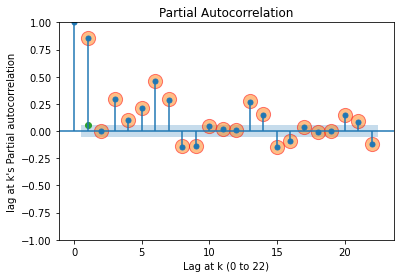

In [7]:
def pacf_plot(data, N_LAGS, pval):
    from statsmodels.graphics.tsaplots import plot_pacf
    from statsmodels.tsa.stattools import pacf
    import scipy.stats

    auto = pd.Series(data.values)
    for i in range(0, N_LAGS+1):
        # lag 별 pacf 추정 계수를 출력하는 부분
        print(f"lag at {i}'s Partial autocorrelation = ", round(pacf(data, alpha=pval)[0][i],2))
        scatter = pd.DataFrame()
        scatter['lags'] = [i for i in range (1, N_LAGS +1)]
        scatter['Partial autocorrelation'] = [pacf(data, alpha=pval)[0][i] for i in range(1, N_LAGS +1)]

    print(f"1번째 lag애서 파란 음영의 값 범위는 -{scipy.stats.norm.ppf(1-(pval)/2) * np.sqrt(1/(data.shape[0]-1))}, +{scipy.stats.norm.ppf(1-(pval)/2) * np.sqrt(1/(data.shape[0]-1))}입니다.")
    
    plot_pacf(data, lags=N_LAGS, alpha=pval, method='ywm')
    plt.xlabel(f'Lag at k (0 to {N_LAGS})')
    plt.ylabel("lag at k's Partial autocorrelation")
    # lag 별로 PACF 추정 계수를 점으로 찍는 부분
    plt.scatter(x=scatter['lags'], y=scatter['Partial autocorrelation'], edgecolors='red',linewidth=1, s=200, alpha = .5)
    # lag = 1 에서 신뢰구간의 upper 부분을 점으로 찍는 부분
    plt.scatter(x=1, y=[scipy.stats.norm.ppf(1-(pval)/2) * (1/np.sqrt(data.shape[0]))])
    plt.show()

pacf_plot(data['rides'], 22, 0.05)

In [8]:
# pacf 구하는 함수 생성
def pacf(data, alpha, N_LAGS):
    from statsmodels.tsa.stattools import pacf

    result = pd.DataFrame()

    result['pacf'] = pacf(data, alpha=alpha)[0][:N_LAGS+1]
    result['upper confidence interval'] = [pacf(data, alpha=alpha)[1][i][1] for i in range(N_LAGS + 1)]
    result['lower confidence interval'] = [pacf(data, alpha=alpha)[1][i][0] for i in range(N_LAGS + 1)]
    
    return result

result = pacf(rides['rides'], 0.05, 22)
result

,pacf,upper confidence interval,lower confidence interval
0,1.000000,1.000000,1.000000
1,0.858297,0.909626,0.806967
2,-0.000813,0.050516,-0.052143
3,0.293658,0.344987,0.242328
4,0.103616,0.154946,0.052286
5,0.211171,0.262501,0.159841
6,0.462841,0.514171,0.411512
7,0.295598,0.346928,0.244268
8,-0.137638,-0.086308,-0.188967
9,-0.139587,-0.088257,-0.190917
